# Exploratory Data Analysis on the Kiva Dataset

In this notebook, I will conduct an exploratory data analysis (EDA) on the Kiva dataset. Through this analysis, I aim to uncover insights and trends within the data, enhancing our understanding of Kiva's microfinance initiatives.

In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import folium



In [3]:
# These lines of code read four CSV files related to Kiva loans and store them as Pandas DataFrames.
df_kiva_loans = pd.read_csv("kiva_loans.csv")
kivi_mpi_region = pd.read_csv("kiva_mpi_region_locations.csv")
loan_theme_ids_csv = pd.read_csv("loan_theme_ids.csv")
loan_themes_by_region = pd.read_csv("loan_themes_by_region.csv")

In [4]:
df_kiva_loans.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [5]:
kivi_mpi_region.columns

Index(['LocationName', 'ISO', 'country', 'region', 'world_region', 'MPI',
       'geo', 'lat', 'lon'],
      dtype='object')

In [6]:
loan_theme_ids_csv.columns

Index(['id', 'Loan Theme ID', 'Loan Theme Type', 'Partner ID'], dtype='object')

In [7]:
loan_themes_by_region.columns

Index(['Partner ID', 'Field Partner Name', 'sector', 'Loan Theme ID',
       'Loan Theme Type', 'country', 'forkiva', 'region', 'geocode_old', 'ISO',
       'number', 'amount', 'LocationName', 'geocode', 'names', 'geo', 'lat',
       'lon', 'mpi_region', 'mpi_geo', 'rural_pct'],
      dtype='object')

## Data cleaning

Now that we have explored the columns, the next step is to clean the data. First, we will check the percentage of missing values in each column and remove those with a significant amount of missing data. Additionally, I will drop any columns that are not relevant to our analysis. Furthermore, I will create a new column called funded, as the funded_time column contains missing values. These missing values indicate that the loan has not yet been funded.



In [8]:
df_kiva_loans.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01


In [9]:
# Calculate the percentage of missing values for each column in df_kiva_loans
missing_percentage = (df_kiva_loans.isnull().sum() / len(df_kiva_loans)) * 100

# Displaying the results
print(missing_percentage)

id                     0.000000
funded_amount          0.000000
loan_amount            0.000000
activity               0.000000
sector                 0.000000
use                    0.630508
country_code           0.001192
country                0.000000
region                 8.462392
currency               0.000000
partner_id             2.012351
posted_time            0.000000
disbursed_time         0.356970
funded_time            7.200632
term_in_months         0.000000
lender_count           0.000000
tags                  25.538546
borrower_genders       0.628869
repayment_interval     0.000000
date                   0.000000
dtype: float64


In [10]:
# Drop id, region and tags columns
df_kiva_loans = df_kiva_loans.drop(['tags', 'id','region'], axis=1)

In [11]:
# Check for missing values
df_kiva_loans.isnull().sum()

funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                    4232
country_code              8
country                   0
currency                  0
partner_id            13507
posted_time               0
disbursed_time         2396
funded_time           48331
term_in_months            0
lender_count              0
borrower_genders       4221
repayment_interval        0
date                      0
dtype: int64

In [12]:
# Create a new column 'funded' which is True if 'funded_time' is not null, and False otherwise
df_kiva_loans['funded'] = df_kiva_loans['funded_time'].notnull()

In [13]:
# Count True and False values in the funded column
counts = df_kiva_loans['funded'].value_counts()

counts

funded
True     622874
False     48331
Name: count, dtype: int64

## Sector Analysis of Kiva Loans

In this section, we analyze the distribution of loans across various sectors on the Kiva platform. We will visualize the number of loans and calculate the average loan amounts for each sector. This analysis will highlight the sectors that receive the most funding and provide insights into Kiva's impact on different areas of microfinance.

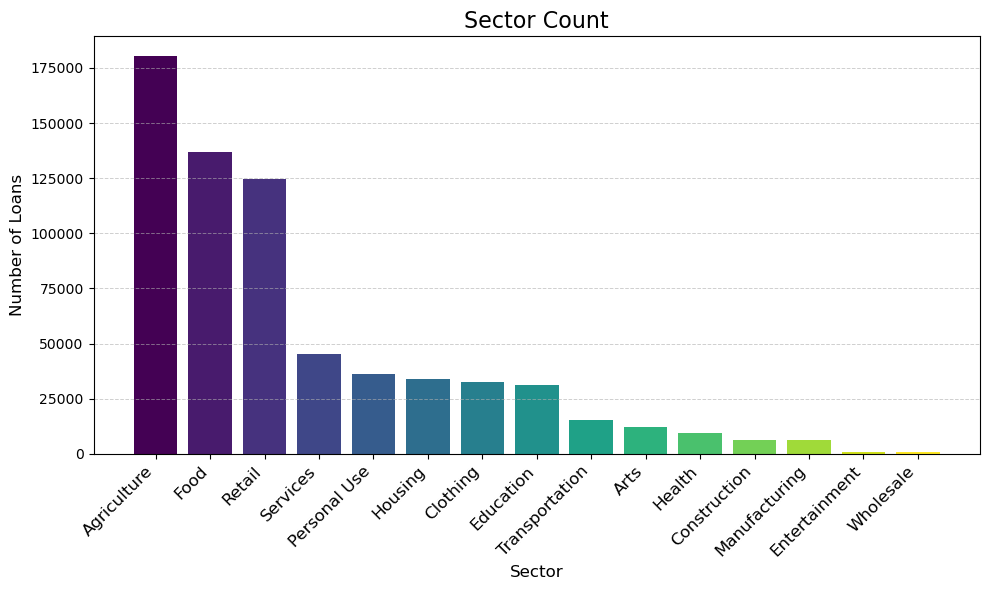

In [14]:
# Calculate the count of loans by sector
sectors_count = df_kiva_loans['sector'].value_counts()

# Set up the figure size
plt.figure(figsize=(10, 6))

# Use viridis color palette for the bar plot
colors = plt.cm.viridis(np.linspace(0, 1, len(sectors_count)))

# Create the bar plot for sector counts
plt.bar(sectors_count.index, sectors_count.values, color=colors)

# Set the title and axis labels
plt.title('Sector Count', fontsize=16)
plt.ylabel('Number of Loans', fontsize=12)
plt.xlabel('Sector', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines to make the plot easier to interpret
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.6)


# Display the plot with a tight layout
plt.tight_layout()
plt.show()

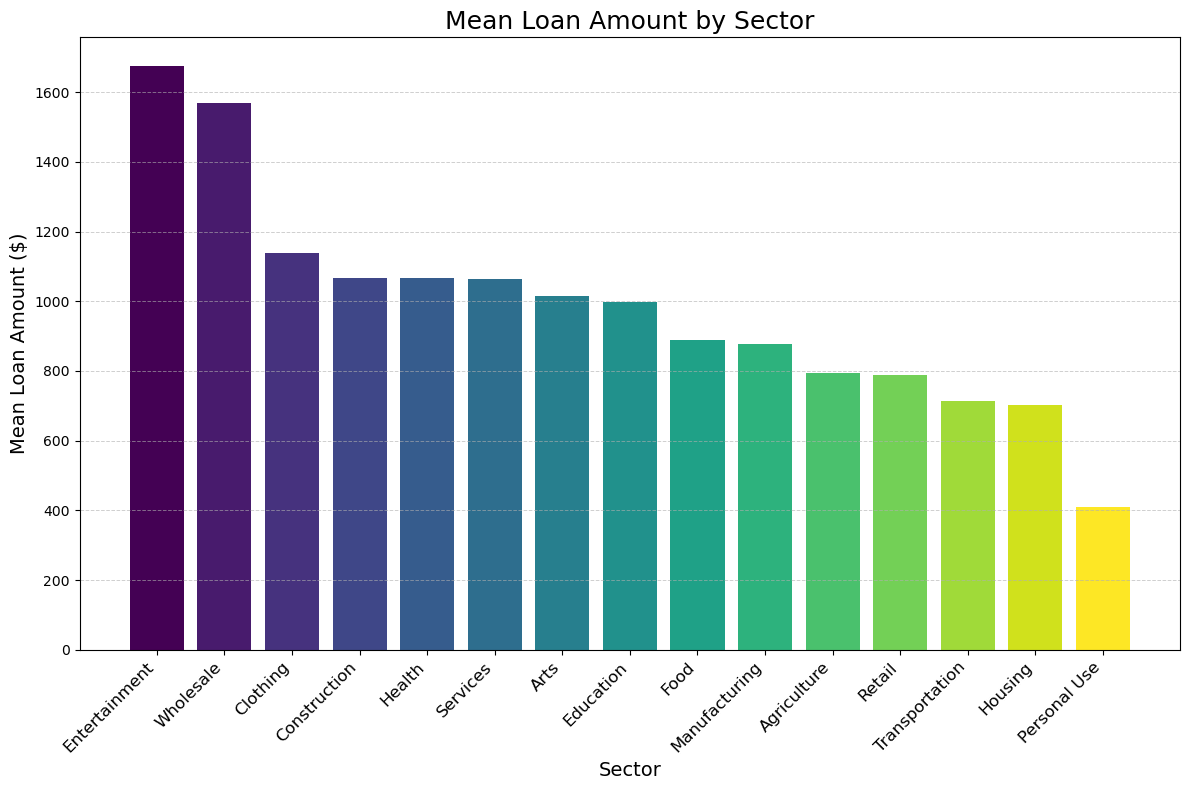

In [15]:
# Calculate the mean loan amount by sector
sectors_amount = df_kiva_loans.groupby(['sector'])['loan_amount'].mean().sort_values(ascending=False)

# Set up the figure size
plt.figure(figsize=(12, 8)) 

# Use viridis color palette for the bar plot
colors = plt.cm.viridis(np.linspace(0, 1, len(sectors_amount)))

# Create the bar plot for mean loan amount by sector
plt.bar(sectors_amount.index, sectors_amount.values, color=colors)

# Set the title and axis labels with larger font sizes
plt.title('Mean Loan Amount by Sector', fontsize=18)
plt.ylabel('Mean Loan Amount ($)', fontsize=14)
plt.xlabel('Sector', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines to make the plot easier to interpret
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# Display the plot with a tight layout
plt.tight_layout()
plt.show()


/var/folders/04/r5r2w3296z124ydph14n15080000gn/T/ipykernel_16347/3949438248.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sector', y='loan_amount', data=df_kiva_loans_filtered, palette=palette)
/var/folders/04/r5r2w3296z124ydph14n15080000gn/T/ipykernel_16347/3949438248.py:21: UserWarning: 
The palette list has fewer values (6) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='sector', y='loan_amount', data=df_kiva_loans_filtered, palette=palette)


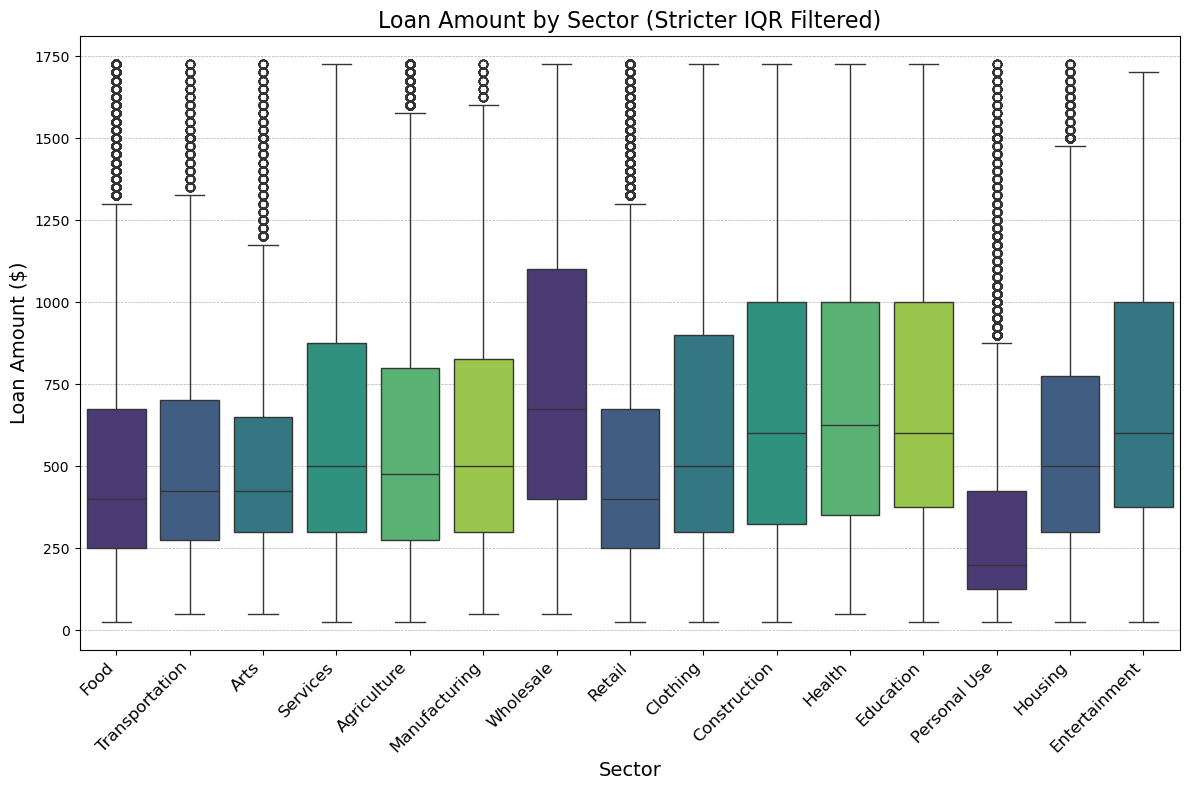

In [16]:
# Calculate IQR for the loan amount
Q1 = df_kiva_loans['loan_amount'].quantile(0.25)
Q3 = df_kiva_loans['loan_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for non-outlier values
lower_bound = Q1 - 1.0 * IQR
upper_bound = Q3 + 1.0 * IQR

# Filter out outliers beyond the stricter IQR range
df_kiva_loans_filtered = df_kiva_loans[(df_kiva_loans['loan_amount'] >= lower_bound) & 
                                       (df_kiva_loans['loan_amount'] <= upper_bound)]

# Set the figure size
plt.figure(figsize=(12, 8))

# Color palette for sectors
palette = sns.color_palette("viridis")

# Create a box plot for filtered loan amounts by sector
sns.boxplot(x='sector', y='loan_amount', data=df_kiva_loans_filtered, palette=palette)

# Add a title and axis labels
plt.title('Loan Amount by Sector (Stricter IQR Filtered)', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Loan Amount ($)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add grid for better readability
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Show the plot with a tight layout
plt.tight_layout()
plt.show()


## Repayment Interval Distribution

In this section, we examine the distribution of loans based on their repayment intervals. 

/var/folders/04/r5r2w3296z124ydph14n15080000gn/T/ipykernel_16347/1104517538.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=repayment.index, y=repayment.values, palette='viridis')


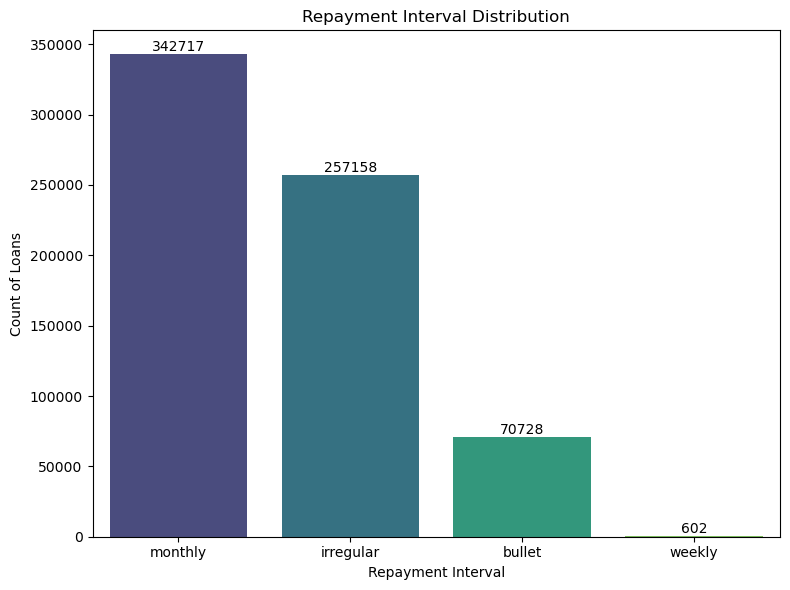

In [17]:
# Get the repayment interval value counts
repayment = df_kiva_loans['repayment_interval'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=repayment.index, y=repayment.values, palette='viridis')

# Add labels on top of all bars
for container in ax.containers:
    ax.bar_label(container)

# Set the title and labels
plt.title('Repayment Interval Distribution')
plt.xlabel('Repayment Interval')
plt.ylabel('Count of Loans')

# Display the plot
plt.tight_layout()
plt.show()


## Country Analysis

In this section, we will explore the countries that are borrowing from Kiva. We will analyze the distribution of loans across different countries to understand where Kiva's impact is most significant and identify trends in borrowing behavior globally.

/var/folders/04/r5r2w3296z124ydph14n15080000gn/T/ipykernel_16347/3678652221.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')


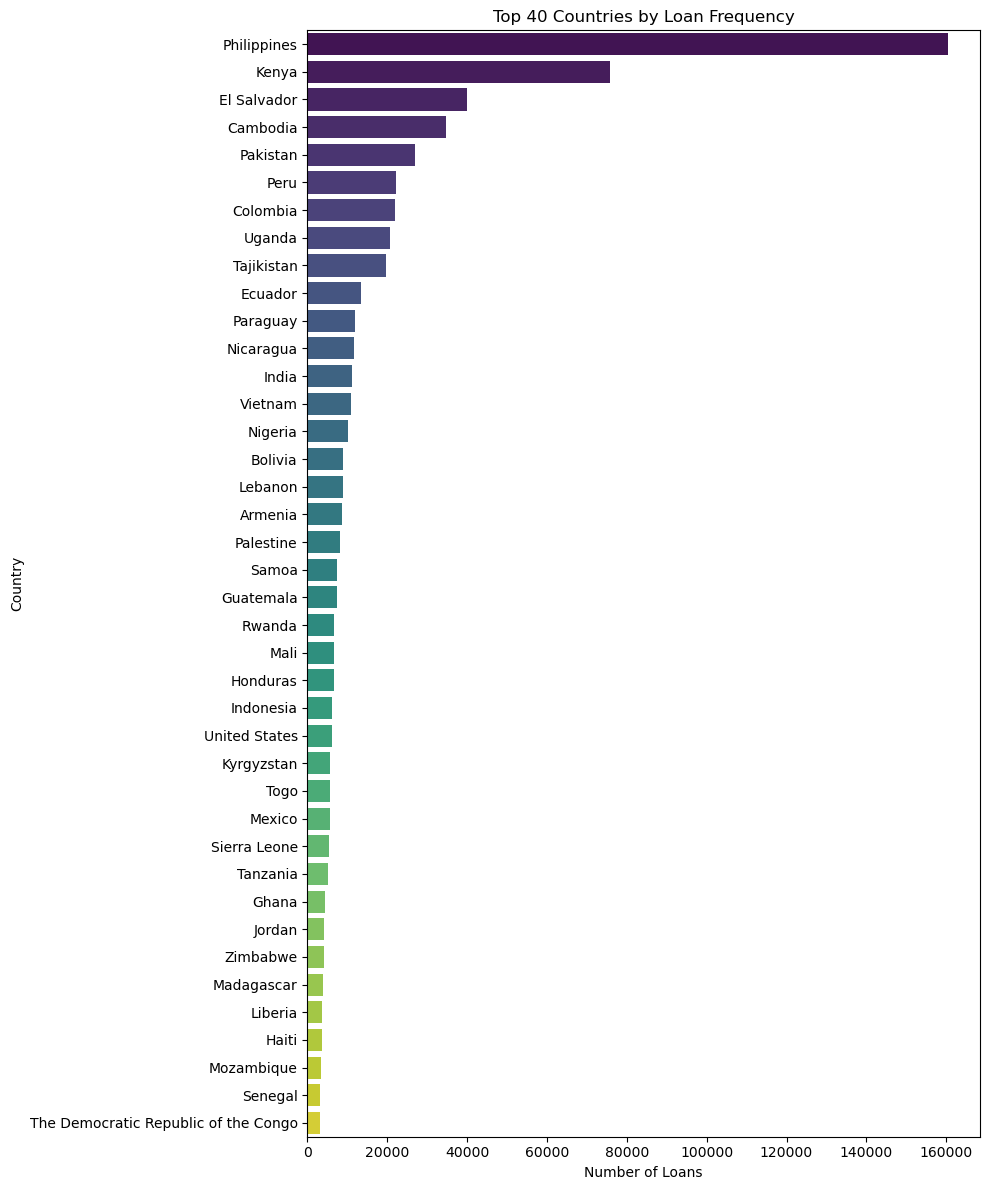

In [18]:
# Get the top 40 countries by loan count
country_counts = df_kiva_loans['country'].value_counts().head(40)

# Set up the figure size
plt.figure(figsize=(10, 12))

# Create a horizontal bar plot
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')

# Set the title and labels
plt.title('Top 40 Countries by Loan Frequency')
plt.xlabel('Number of Loans')
plt.ylabel('Country')

# Display the plot 
plt.tight_layout()
plt.show()

In [19]:
# Using the cleaned dataset (without missing lat/lon values. These columns were both missing around 70 percent of values)
df_kiva_cleaned = kivi_mpi_region.dropna(subset=['lat', 'lon'])

# Create a map centered at a specific location 
m = folium.Map(location=[0, 0], zoom_start=2)  # Centering the map near the equator

# Add markers for each customer in the cleaned dataset
for index, row in df_kiva_cleaned.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],  # Latitude and longitude of the location
        radius=5,  # Size of the marker
        popup=f"{row['country']}",  
        color='blue', 
        fill=True,
        fill_color='blue'
    ).add_to(m)

# Display the map
m 

In [20]:
# Identify the top 10 countries and calculate the loan count for males and females in those countries
top_10_countries = df_kiva_loans['country'].value_counts().head(10).index
gender_by_country = df_kiva_loans[df_kiva_loans['country'].isin(top_10_countries)].groupby(['country', 'borrower_genders'])['borrower_genders'].count().reset_index(name='count')
gender_by_country = gender_by_country[gender_by_country['borrower_genders'].isin(['male', 'female'])]

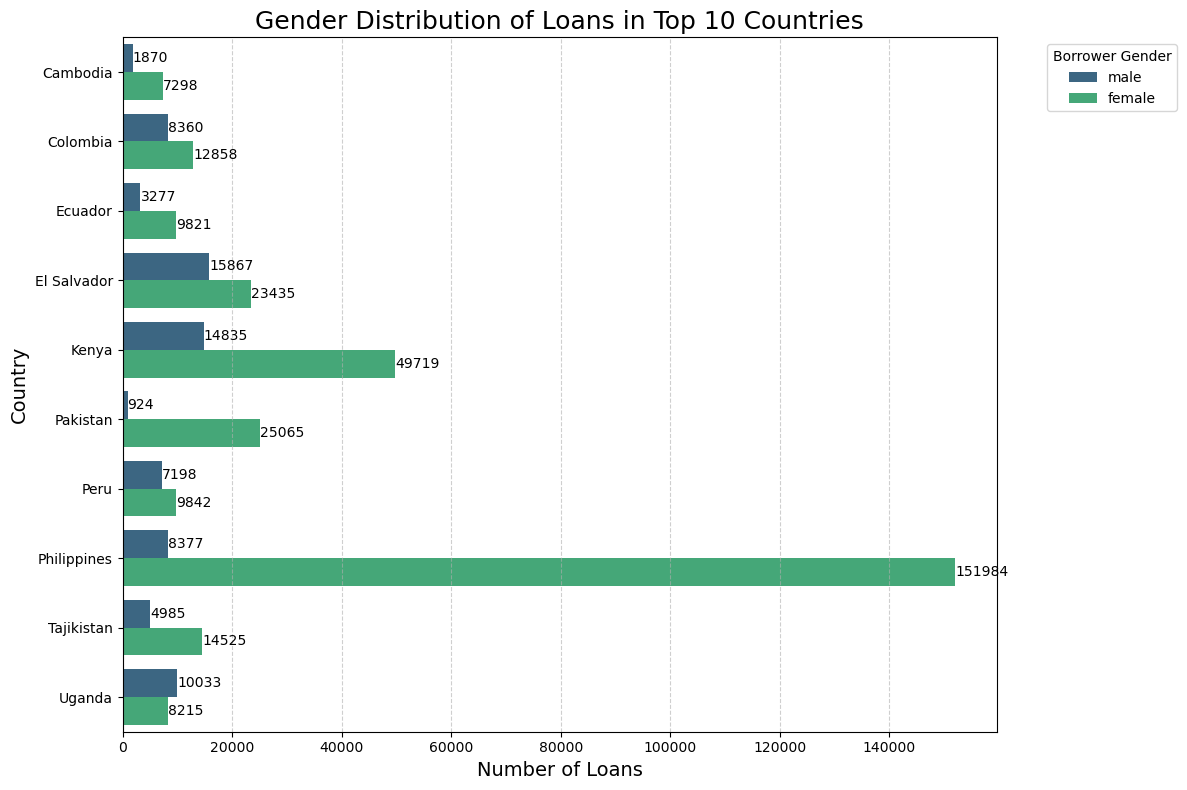

In [21]:
# Set up the figure size
plt.figure(figsize=(12, 8)) 

# Create a horizontal bar plot with the 'viridis' color palette
sns.barplot(x='count', y='country', hue='borrower_genders', data=gender_by_country, 
            palette='viridis', hue_order=['male', 'female'])

# Set the title and labels with larger font sizes
plt.title('Gender Distribution of Loans in Top 10 Countries', fontsize=18)
plt.xlabel('Number of Loans', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Add legend outside of the plot for better clarity
plt.legend(title='Borrower Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate each bar with the loan count
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10)

# Add a grid for better readability
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()


## Unfunded Loans: Analyzing Patterns

In this section, we take a closer look at loans that have yet to be funded. By exploring the characteristics of these unfunded loans, we aim to uncover potential reasons behind their current status. Understanding these factors can provide valuable insights into the challenges borrowers face and the broader implications for the Kiva platform. 

In [31]:
# Calculate the percentage of non-funded loans (funded == False)
funded_percentages = df_kiva_loans['funded'].value_counts(normalize=True) * 100
non_funded_percentage = funded_percentages[False] 

# Add a comment with the calculated percentage before the heatmap
print(f"{non_funded_percentage:.2f}% of loans have not been funded.")

7.20% of loans have not been funded.


In [54]:
# Filter for non-funded loans
non_funded_loans = df_kiva_loans[df_kiva_loans['funded'] == False]


In [63]:
# Calculating summary statistics
summary_stats_non_funded = non_funded_loans[['loan_amount', 'funded_amount', 'term_in_months', 'lender_count']].describe()

# Rounding to 2 decimal places for better presentation
summary_stats_non_funded_rounded = summary_stats_non_funded.round(2)

# Print the summary statistics
print(summary_stats_non_funded_rounded)

       loan_amount  funded_amount  term_in_months  lender_count
count     48331.00       48331.00        48331.00      48331.00
mean       1409.93         626.63           18.22         14.94
std        1596.87         813.48            8.30         17.61
min          25.00           0.00            2.00          0.00
25%         600.00         175.00           14.00          5.00
50%        1000.00         400.00           14.00         10.00
75%        1500.00         775.00           21.00         18.00
max       50000.00       46125.00          145.00        805.00


The non-funded loans have an average loan amount of 1,409.93 USD with a standard deviation of 1,596.87 USD, and most loans fall between 600 and 1,500 USD. Although these loans were not fully funded, they received partial funding, with an average funded amount of 626.63 USD. The loan terms typically range from 14 to 21 months, with an average lender count of 15, though some loans had as many as 805 lenders.

## How long does it take to fund a loan, and what factors affect the funding time?

Understanding how long it takes for a loan to get fully funded is crucial for assessing the efficiency of the funding process. By exploring the distribution of funding times, we can identify patterns and determine what influences the speed at which loans receive support. In this section, we'll analyze the duration it takes for loans to be funded and explore key factors—such as loan size, lender count, and other characteristics—that may impact this timeline.

In [24]:
# Converting 'posted_time', 'funded_time', and 'disbursed_time' columns to datetime format
# This ensures that these columns are recognized as proper datetime objects for further time-based calculations
df_kiva_loans['posted_time'] = pd.to_datetime(df_kiva_loans['posted_time'])
df_kiva_loans['funded_time'] = pd.to_datetime(df_kiva_loans['funded_time'])
df_kiva_loans['disbursed_time'] = pd.to_datetime(df_kiva_loans['disbursed_time'])

In [25]:
# Calculate the days it took to fund each loan
df_kiva_loans['days_to_fund'] = (pd.to_datetime(df_kiva_loans['funded_time']) - pd.to_datetime(df_kiva_loans['posted_time'])).dt.days

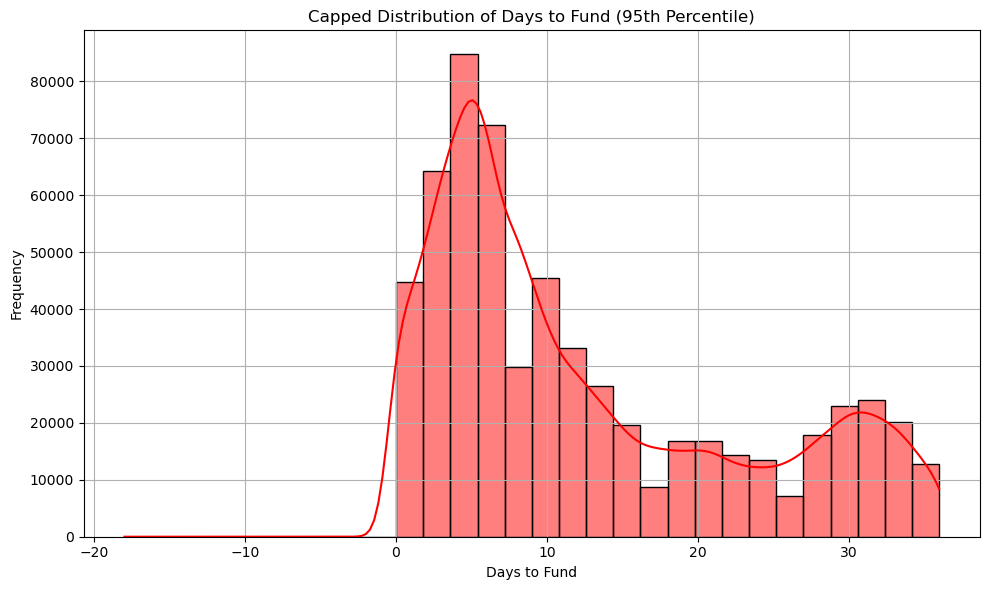

In [26]:
# Limiting 'days_to_fund' at the 95th percentile to reduce the impact of extreme outliers
cap_value = df_kiva_loans['days_to_fund'].quantile(0.95)
df_kiva_loans_capped = df_kiva_loans[df_kiva_loans['days_to_fund'] <= cap_value]

# Plot the histogram after capping
plt.figure(figsize=(10, 6))
sns.histplot(df_kiva_loans_capped['days_to_fund'], bins=30, kde=True, color='red')
plt.title('Capped Distribution of Days to Fund (95th Percentile)')
plt.xlabel('Days to Fund')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

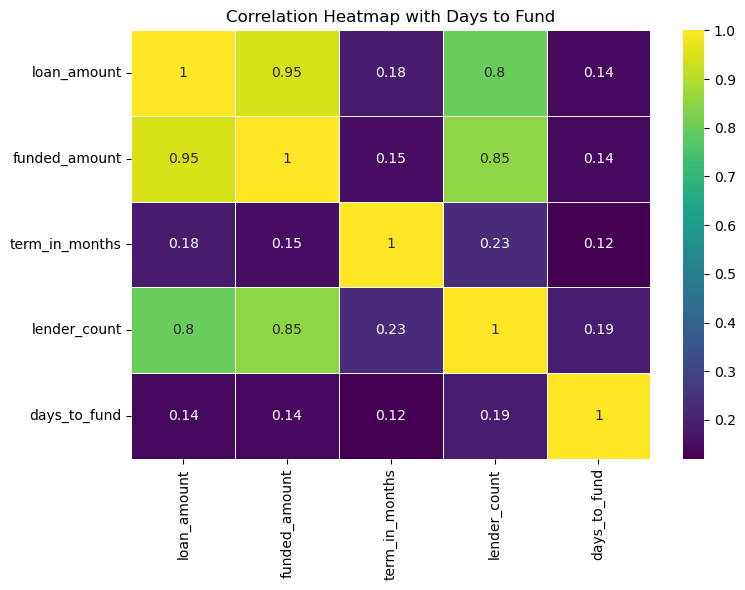

In [27]:
# Correlation heatmap, including 'days_to_fund'
correlation_columns = ['loan_amount', 'funded_amount', 'term_in_months', 'lender_count', 'days_to_fund']
corr_matrix = df_kiva_loans[correlation_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap with Days to Fund')
plt.tight_layout()
plt.show()

The heatmap shows that days_to_fund has a weak positive correlation with other variables, such as loan_amount (0.14), funded_amount (0.12), and lender_count (0.19). This suggests that larger loans and more lenders are slightly associated with longer funding times. However, the correlations are not strong, indicating that other factors likely influence the time it takes for a loan to be fully funded.